In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx


In [4]:
node_list = range(1,17)
num_nodes = len(node_list)
num_gates = 100

Q = nx.Graph()
Q.add_nodes_from(node_list)

connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        connections.append((node_list[i],node_list[j]))

gate_seq = random.choices(connections, k=num_gates)
print(gate_seq)
gate_seq_iter = gate_seq.copy()

query_seq = []
query = []
gate_mul = {}
gate_mul_seq = []
while len(gate_seq_iter)>0:
    # print(gate_seq_iter)
    inds_keep = []
    not_block_gate = True
    for i_g, gate_nodes in enumerate(gate_seq_iter):
        if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
            if gate_nodes in query and not_block_gate:
                gate_mul[gate_nodes] += 1
                # query.append(gate_nodes)
            else:
                inds_keep.append(i_g)
                not_block_gate = False
        else:
            Q.add_edge(gate_nodes[0],gate_nodes[1])
            query.append(gate_nodes)
            gate_mul[gate_nodes] =  1
            not_block_gate = True

    query_seq.append(query)
    gate_mul_seq.append(gate_mul)
    query = []
    gate_mul = {}
    Q = nx.Graph()
    Q.add_nodes_from(node_list)
    gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

print(query_seq)
# print(gate_mul_seq)
# # Q.add_edges_from(gate_seq)

# nx.draw(Q, node_size=40,  with_labels=True)
# plt.show()

gate_mul_orig = {}
gate_mul_query = {}
for link in connections:
    gate_mul_orig[link] = 0
    gate_mul_query[link] = 0
    
for gate in gate_seq:
    gate_mul_orig[gate] += 1

for i_q, query in enumerate(query_seq):
    for gate in query:
        gate_mul_query[gate] += gate_mul_seq[i_q][gate]

print(gate_mul_orig)
print(gate_mul_query)

[(4, 11), (1, 6), (6, 9), (2, 11), (4, 10), (8, 10), (3, 11), (2, 10), (7, 16), (5, 6), (6, 11), (6, 11), (13, 16), (1, 3), (11, 16), (1, 6), (6, 7), (8, 11), (2, 9), (8, 9), (1, 5), (1, 12), (3, 6), (1, 11), (1, 16), (4, 13), (7, 12), (3, 10), (3, 4), (10, 12), (7, 9), (6, 15), (5, 6), (9, 16), (9, 14), (14, 15), (1, 2), (5, 16), (5, 9), (7, 14), (3, 4), (2, 3), (6, 9), (2, 15), (3, 12), (2, 8), (9, 10), (5, 14), (4, 16), (8, 14), (12, 13), (3, 10), (1, 10), (6, 14), (4, 13), (11, 14), (8, 11), (8, 12), (2, 8), (3, 11), (11, 12), (6, 15), (3, 12), (9, 11), (1, 5), (9, 13), (10, 13), (13, 15), (2, 8), (5, 11), (2, 4), (3, 9), (2, 16), (1, 10), (9, 15), (3, 16), (4, 11), (1, 13), (5, 16), (6, 12), (8, 9), (3, 5), (8, 13), (7, 9), (3, 16), (10, 13), (5, 16), (10, 15), (5, 12), (3, 10), (7, 16), (4, 14), (8, 14), (10, 12), (6, 10), (12, 15), (8, 16), (4, 9), (2, 14), (3, 5)]
[[(4, 11), (1, 6), (8, 10), (7, 16), (2, 9), (14, 15), (3, 12)], [(6, 9), (2, 11), (4, 10), (13, 16), (1, 3), (7, 1

In [4]:
def parallel_circuit_gen(node_list, num_gates):
    # node_list = range(1,5)
    num_nodes = len(node_list)
    # num_gates = 200

    Q = nx.Graph()
    Q.add_nodes_from(node_list)

    connections = []
    for i in range(num_nodes):
        for j in range(i+1,num_nodes):
            connections.append((node_list[i],node_list[j]))

    gate_seq = random.choices(connections, k=num_gates)
    gate_seq_iter = gate_seq.copy()

    query_seq = []
    query = []
    gate_mul = {}
    gate_mul_seq = []
    while len(gate_seq_iter)>0:
        # print(gate_seq_iter)
        inds_keep = []
        not_block_gate = True
        for i_g, gate_nodes in enumerate(gate_seq_iter):
            if Q.degree[gate_nodes[0]] > 0 or Q.degree[gate_nodes[1]] > 0:
                if gate_nodes in query and not_block_gate:
                    gate_mul[gate_nodes] += 1
                    # query.append(gate_nodes)
                else:
                    inds_keep.append(i_g)
                    not_block_gate = False
            else:
                Q.add_edge(gate_nodes[0],gate_nodes[1])
                query.append(gate_nodes)
                gate_mul[gate_nodes] =  1
                not_block_gate = True

        query_seq.append(query)
        gate_mul_seq.append(gate_mul)
        query = []
        gate_mul = {}
        Q = nx.Graph()
        Q.add_nodes_from(node_list)
        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]

    return query_seq, gate_mul_seq

# Clos

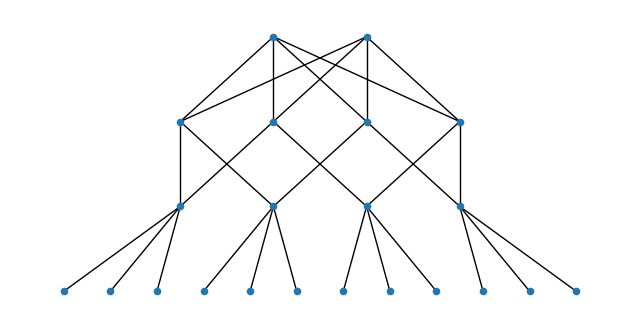

In [14]:
n = 4 # starts from 4
bandwidth = 2
num_bsm = 1
num_ToR = 3
num_core = n // 2
num_agg = n
num_edge = n**2 // 4
num_nodes = num_edge * num_ToR # number of q nodes
# num_bsms = num_leaves # number of BSMs

if n==4:
    conn_right = [7]
    conn_left = [8]
elif n==6:
    conn_right = [11,14]
    conn_left = [12,15]
elif n==8:
    conn_right = [15,19,23]
    conn_left = [16,20,24]

num_vertices = num_core + num_agg + num_edge + num_nodes
core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')

for core in core_switches:
    for agg in agg_switches:
        G.add_edge(core,agg, weight=core_bw)

new_edges = []
extra_edges = []
agg_conn = np.ones(num_agg)* (n//2)
for i, edge in enumerate(edge_switches):
    i1 = np.argwhere(agg_conn>0)[0,0]
    G.add_edge(edge,agg_switches[i1], weight=agg_bw)
    agg_conn[i1] -= 1 
    if edge in conn_left:
        extra_edges.append((edge,agg_switches[i1]))
        new_edges.append((edge,agg_switches[i1-1]))
    G.add_edge(edge,agg_switches[i1+1], weight=agg_bw)
    agg_conn[i1+1] -= 1 
    if edge in conn_right:
        extra_edges.append((edge,agg_switches[i1+1]))
        new_edges.append((edge,agg_switches[i1+2]))

G.remove_edges_from(extra_edges)
G.add_edges_from(new_edges, weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(num_ToR):
        G.add_edge(edge,node_list[num_ToR*i+j], weight=edge_bw)
    
shift = 1
pos_core = {i: (shift+i+ n/4 ,2) for i in core_switches}
pos_agg = {i: (shift+(i-n//2)% n,1) for i in agg_switches}
pos_edge = {i: (shift+i-7*n/4+1,0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


fig, ax = plt.subplots(figsize=(8,4))

nx.draw(G, pos, node_size=20)#,  with_labels=True)
plt.show()

# fat tree

In [8]:
n = 4 # starts from 4
bandwidth = 4
num_bsm = 1
num_core = n**2 // 4
num_agg = n * (n // 2)
num_edge = n * (n // 2)
num_nodes = num_edge * (n // 2) # number of q nodes

core_bw = 4*bandwidth
agg_bw = 2*bandwidth
edge_bw = bandwidth
num_vertices = num_core + num_agg + num_edge + num_nodes

G = nx.Graph()
core_switches = range(num_core)
G.add_nodes_from(core_switches, type='core')
agg_switches = range(num_core,num_core+num_agg)
G.add_nodes_from(agg_switches, type='agg')
edge_switches = range(num_core+num_agg,num_core + num_agg + num_edge)
G.add_nodes_from(edge_switches, type='agg')
node_list = range(num_core + num_agg + num_edge,num_vertices)
G.add_nodes_from(node_list, type='node')


for i_c, core in enumerate(core_switches):
    for i_a, agg in enumerate(agg_switches):
        if i_c % 2 ==0 and i_a % 2 ==0:
            G.add_edge(core,agg, weight=core_bw)
        if i_c % 2 ==1 and i_a % 2 ==1:
            G.add_edge(core,agg, weight=core_bw)

for i_a, agg in enumerate(agg_switches):
    G.add_edge(agg,edge_switches[i_a], weight=agg_bw)
    if i_a % 2 == 0:
        G.add_edge(agg,edge_switches[i_a+1], weight=agg_bw)
    else:
        G.add_edge(agg,edge_switches[i_a-1], weight=agg_bw)

for i, edge in enumerate(edge_switches):
    for j in range(n//2):
        G.add_edge(edge,node_list[(n//2)*i+j], weight=edge_bw)
    

pos_core = {i: (i-n//2 + n**2/4 ,2) for i in core_switches}
pos_agg = {i: ((i-n),1) for i in agg_switches}
pos_edge = {i: ((i-n-(n**2//2)),0) for i in edge_switches}
pos_nodes = {node: (i/2-1/4,-1) for i, node in enumerate(node_list)}
pos = pos_core | pos_agg | pos_edge | pos_nodes


gate seq: [(10, 20), (11, 13), (14, 19), (16, 21), (15, 17), (12, 18)]
(10, 20) 2
[1 1 1 0]


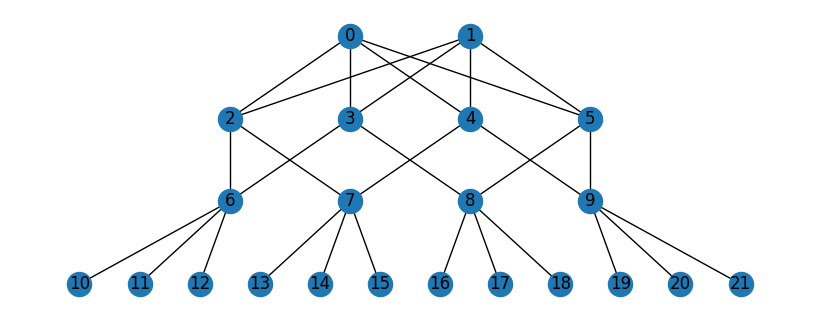

[0 1 1 0]


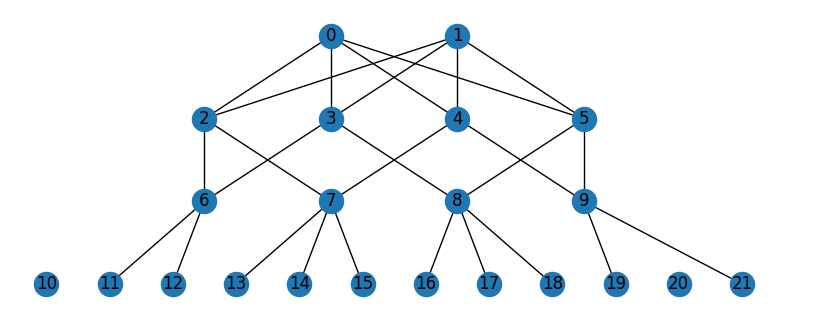

(11, 13) 1
[0 0 1 0]


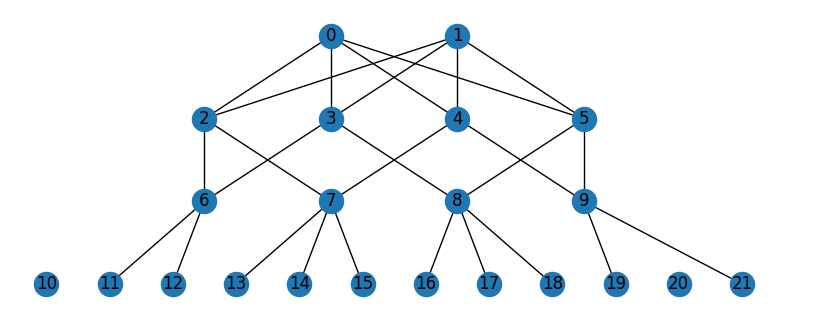

(14, 19) 1
(16, 21) 2
[0 0 0 0]


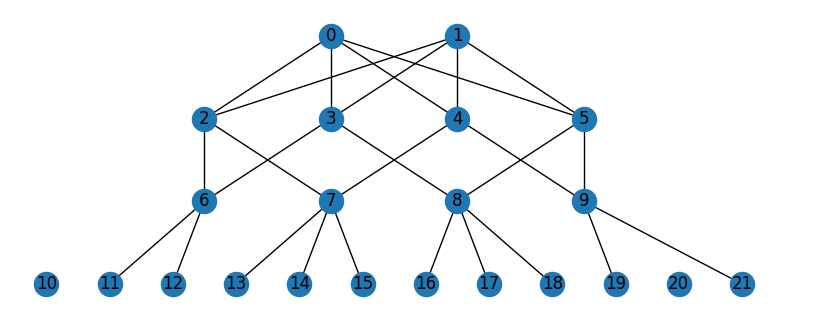

(15, 17) 2
(12, 18) 1
(14, 19) 1
[1 0 1 1]


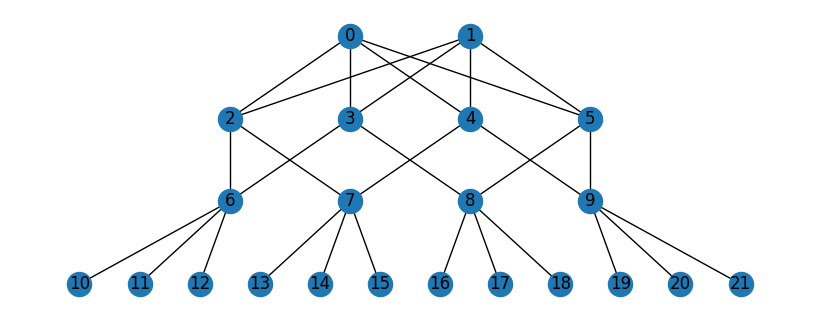

(16, 21) 1
[1 0 0 1]


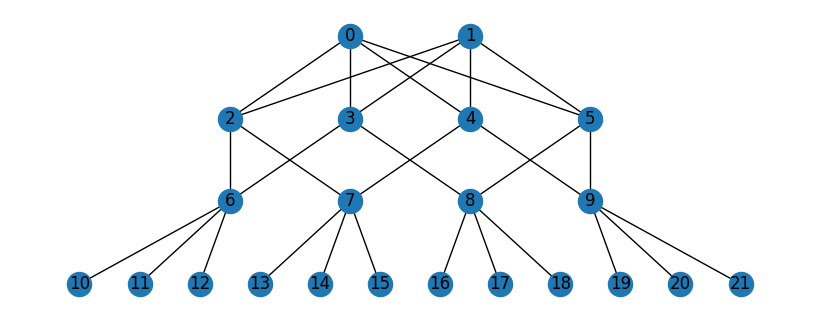

(15, 17) 2
(12, 18) 1
[0 0 0 1]


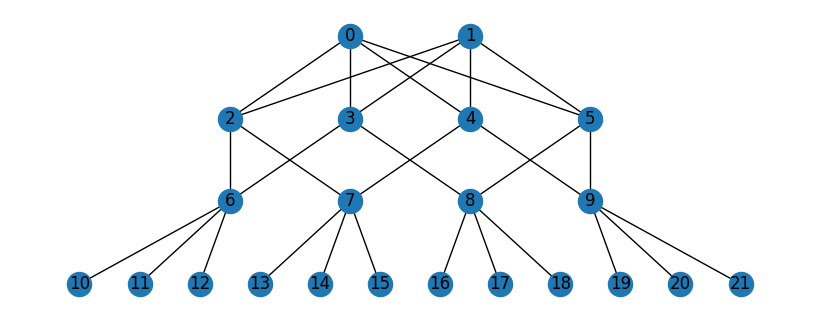

(15, 17) 2
[1 0 1 1]


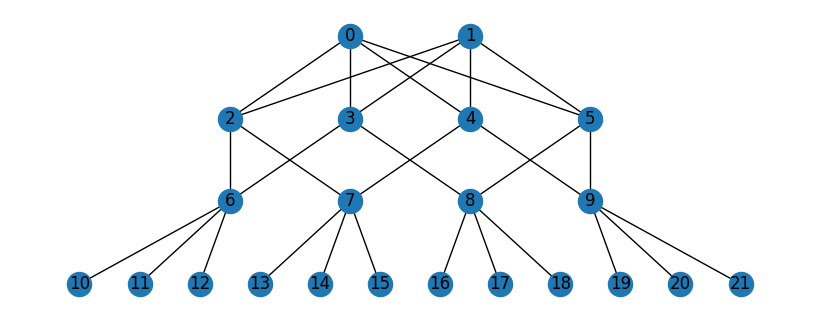

[1 0 0 1]


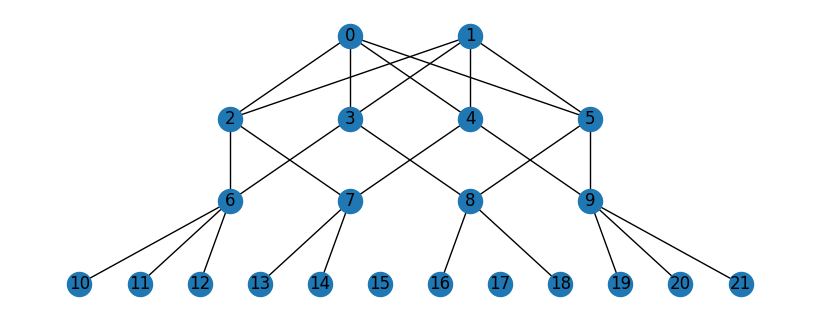

num seq: 6 , num switch: 3 , [4, 3, 2]


In [28]:
def plotter(G_ins,bsm_stat):
    print(bsm_stat)
    plt.figure(figsize=(8,3))
    nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

num_gates = 10000

query_seq, gate_mul_seq = parallel_circuit_gen(node_list, num_gates)

# for i_q, gate_seq in enumerate(query_seq):
for i_q in [0]:
    gate_seq = query_seq[i_q]

    gate_seq_iter = gate_seq[:]
    gate_mul_seq_iter = gate_mul_seq[i_q]
    print("gate seq:", gate_seq)
    # print("num links:", num_links)

    switch_time = []

    while len(gate_seq_iter)>0:
        bsm_stat = np.ones(num_edge,dtype=np.int16)* num_bsm
        G_ins =  G.copy()

        # print(gate_seq_iter)
        inds_keep = []
        for i_g, g in enumerate(gate_seq_iter):
            print(g, gate_mul_seq_iter[g])

            for link in range(gate_mul_seq_iter[g]):
                if nx.has_path(G_ins,g[0],g[1]):
                    shortestpath = nx.shortest_path(G_ins,g[0],g[1],weight=None)
                    # print(shortestpath)
                    
                    sp = []
                    for i in range(0,len(shortestpath)-1):
                        sp.append((shortestpath[i],shortestpath[i+1]))
                    
                    b = []
                    for i, edge in enumerate(edge_switches):
                        if edge in shortestpath:
                            b.append(i)

                    
                    if len(b)>1:
                        if bsm_stat[b[0]] > 0 and bsm_stat[b[1]] > 0:
                            bsm_stat[random.sample(b,1)] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        elif bsm_stat[b[0]] > 0:
                            bsm_stat[b[0]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)
        
                        elif bsm_stat[b[1]] > 0:
                            bsm_stat[b[1]] -= 1
                            for u, v in sp:
                                if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                                else:
                                    G_ins[u][v]['weight'] -= 1
                            plotter(G_ins,bsm_stat)

                        else:
                            inds_keep.append(i_g)
                            gate_mul_seq_iter[g] -= link
                            break

                    elif bsm_stat[b] > 0:
                        bsm_stat[b] -= 1
                        for u, v in sp:
                            if G_ins[u][v]['weight'] == 1:
                                    G_ins.remove_edge(u, v)
                            else:
                                G_ins[u][v]['weight'] -= 1
                        plotter(G_ins,bsm_stat)        
                    else:
                        inds_keep.append(i_g)
                        gate_mul_seq_iter[g] -= link
                        break
                    #     assert 0
                    # # # print(bsm_stat)
                    # print(bsm_stat)
                    # plt.figure(figsize=(8,3))
                    # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
                    # # nx.draw(G,  with_labels=True, node_color = color_list)
                    # plt.show()
                else:
                    inds_keep.append(i_g)
                    gate_mul_seq_iter[g] -= link
                    break

        switch_time.append(np.array(num_bsm-bsm_stat).sum())
        # print(bsm_stat)
        # plt.figure(figsize=(8,3))
        # nx.draw(G_ins, pos,  with_labels=True)#,  node_color = color_list)
        # # nx.draw(G,  with_labels=True, node_color = color_list)
        # plt.show()

        gate_seq_iter = [gate_seq_iter[idx] for idx in inds_keep]
        gate_mul_seq_iter = {g:gate_mul_seq_iter[g] for g in gate_seq_iter}

    print("num seq:", len(gate_seq), ", num switch:", len(switch_time), ",",switch_time)